[[  0  74  29 ...,  64  73   0]
 [  0  63  23 ...,  70  96   0]
 [  0  40  10 ...,  53 121   0]
 ..., 
 [  0  29   6 ...,  33 143   0]
 [  0  57   6 ...,  86 158   0]
 [  0  73  16 ..., 111 165   0]]
[[  0   0   0 ...,   0   0   0]
 [ 36  27  12 ...,  75 100 120]
 [ 32  22   6 ...,  32  51  48]
 ..., 
 [ 25  14   0 ...,   7  38  45]
 [ 46  33  11 ...,  27  55  61]
 [  0   0   0 ...,   0   0   0]]


<function matplotlib.pyplot.imshow>

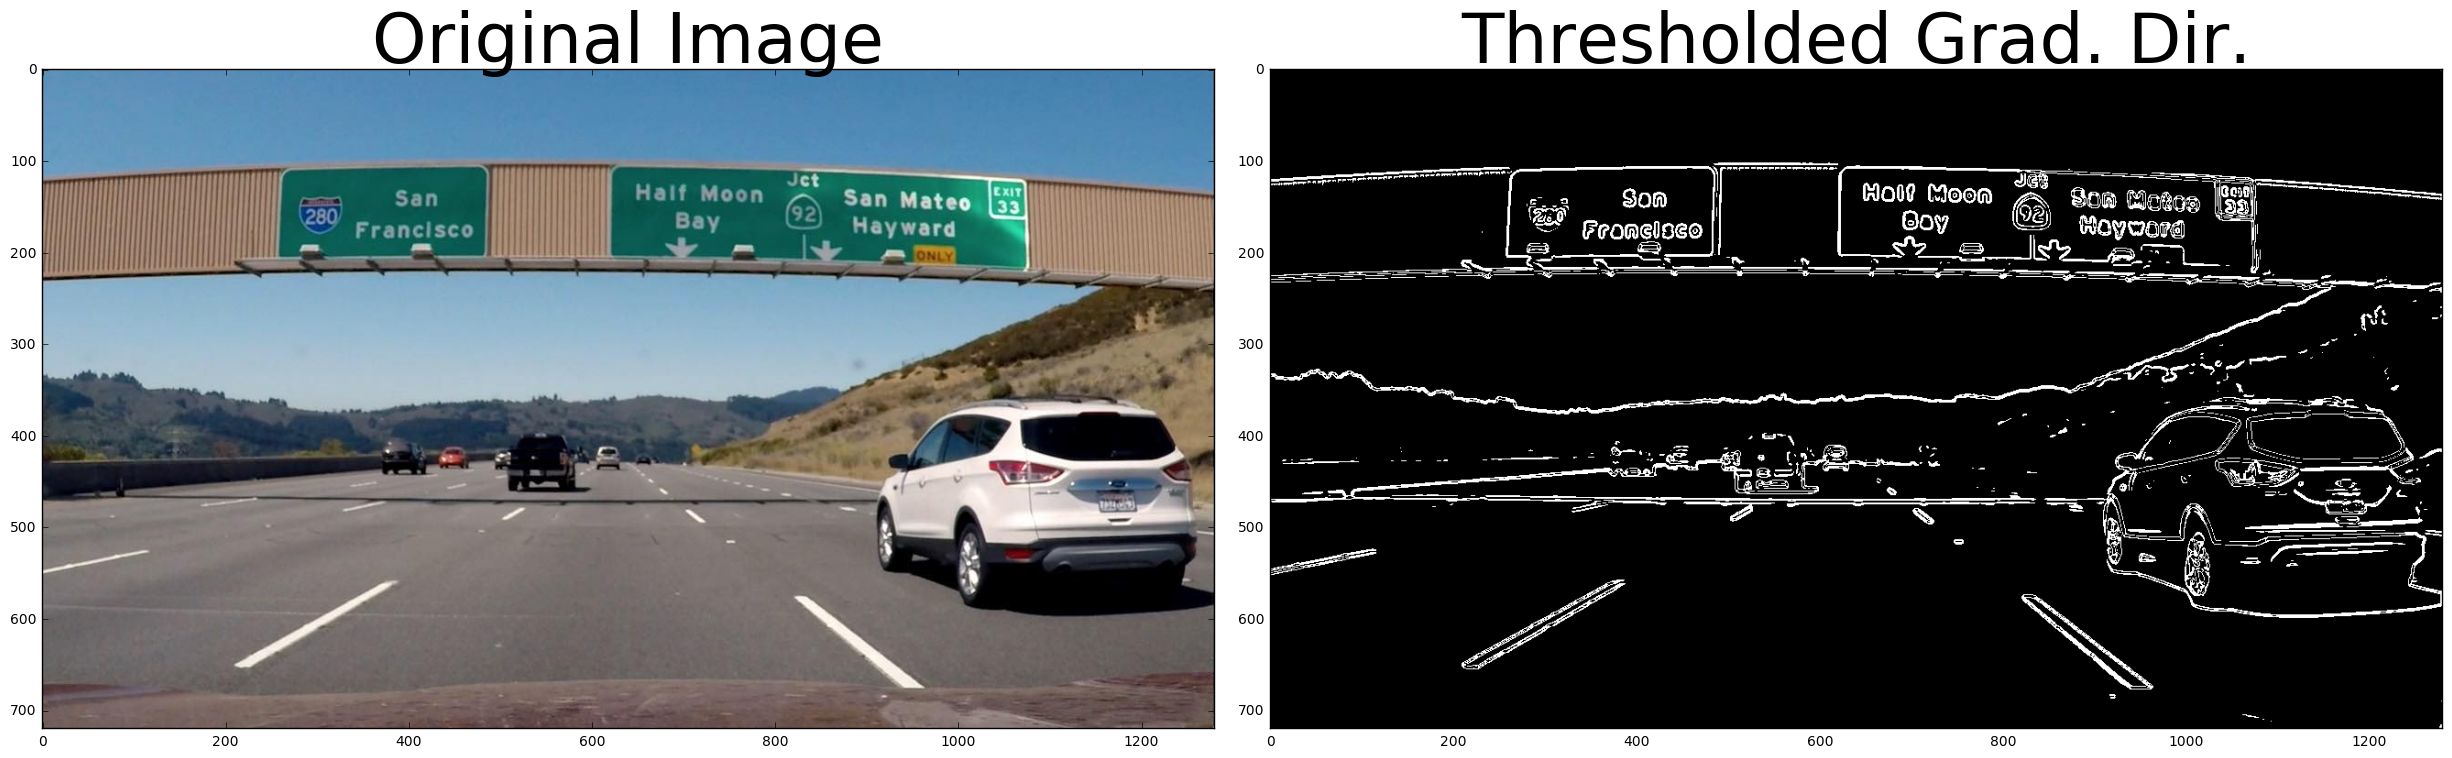

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Read in an image
image = mpimg.imread('road.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel, thresh):
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    
    abs_sobelx=np.absolute(sobelx)
    abs_sobely=np.absolute(sobely)
    
    orient = np.arctan2(abs_sobely,abs_sobelx)
    binary_output=np.zeros_like(orient)
    binary_output[(orient>=thresh[0])&(orient<=thresh[1])]=1
    
    return binary_output
    
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient=='x':
        sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0)
    if orient=='y':
        sobelx=cv2.Sobel(gray,cv2.CV_64F,0,1)    
        
    abs_sx=np.absolute(sobelx)
    scaled_sx=np.uint8(255*abs_sx/np.max(abs_sx))
    print (scaled_sx)
    binary_output=np.zeros_like(scaled_sx)
    binary_output[(scaled_sx>=thresh[0])&(scaled_sx<=thresh[1])]=1
    
    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=9)
    sobely=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=9)
    grad = np.sqrt(sobelx**2 + sobely**2)
    s9bit = np.uint8(255*grad/np.max(grad))
    binary_output = np.zeros_like(s9bit)
    mint = mag_thresh[0]
    maxt=mag_thresh[1]
    binary_output[(s9bit>=mint)&(s9bit<=maxt)]=1
    return binary_output

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(50, 120))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(50, 120))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(50, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, 1.7))
    
# Run the function
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
#combined[((gradx == 1))] = 1


# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.imshow